# Dev Agarwal 220968019 A1 6
# Naive Bayes- income evaluation

1. Import libraries

2. Import dataset(adult.csv)

3. Exploratory data analysis 

View dimensions of the dataset

Rename column names

View summary of the dataset

Explore categorical variables and view them

check missing values in categorical variables

view frequency counts of values in categorical variables

view frequency distribution of categorical variables

Explore workclass variable - 

check labels in the workclass variable

check the frequency distribution of values in the workclass variable

replace '?' values in the workclass variable with `NaN`

Explore occupation variable

check the frequency distribution of values in the occupation variable	

replace '?' values in occupation variable with `NaN`

Explore native_country variable

check labels in the native_country variable

check the frequency distribution of values in the native_country variable
			replace '?' values in the native_country variable with `NaN`

Check missing values in categorical variables again

Explore Numerical Variables

view the numerical variables

check missing values in numerical variables



In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
import warnings
warnings.filterwarnings('ignore')

In [231]:
df=pd.read_csv('NB1.csv')

In [232]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [233]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [234]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [235]:
df.columns=['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income']

In [236]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [237]:
df.columns=df.columns.str.strip()

In [238]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [239]:
df.shape

(32560, 15)

In [240]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [242]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [243]:
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [244]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [245]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [246]:
for var in categorical: 
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [247]:
for var in categorical: 
    print(df[var].value_counts()/(len(df)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

In [248]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [249]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [250]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [251]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [252]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [253]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [254]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [255]:
df['occupation'].replace('?', np.NaN, inplace=True)

In [256]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [257]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [258]:
df['native-country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [259]:
df['native-country'].replace('?', np.NaN, inplace=True)

In [260]:
df['native-country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [261]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [262]:
for var in categorical:
    print(var,"-",len(df[var].unique()))

workclass - 9
education - 16
marital-status - 7
occupation - 15
relationship - 6
race - 5
sex - 2
native-country - 42
income - 2


In [263]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [264]:
df[numerical].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [265]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

# 4. Declare feature vector and target variable 

In [266]:
X=df.drop('income',axis=1)
y=df.income

# 5. Split data into separate training and test set

In [267]:
from sklearn.model_selection import train_test_split as t
X_train,X_test,y_train,y_test=t(X,y,test_size=0.3,random_state=0)

In [268]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

# 6. print the percentage of missing values in the categorical variables in the training set

In [269]:
X_train.isnull().sum().sum()/(X_train.shape[0]*X_train.shape[1])

0.0

In [270]:
X_test.isnull().sum().sum()/(X_test.shape[0]*X_test.shape[1])

0.0

# 7. print categorical variables with missing data

In [271]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [272]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [273]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [274]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

# 8. impute missing categorical variables with the most frequent value

In [275]:
for c in categorical:
    df[c]=df[c].mode()

# 9. Encode categorical variables

In [276]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [277]:
from sklearn import preprocessing
en=preprocessing.LabelEncoder()
for x in categorical:
    df[x]=en.fit_transform(df[x])

In [278]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,<=50K
1,38,1,215646,1,9,1,1,1,1,1,0,0,40,1,<=50K
2,53,1,234721,1,7,1,1,1,1,1,0,0,40,1,<=50K
3,28,1,338409,1,13,1,1,1,1,1,0,0,40,1,<=50K
4,37,1,284582,1,14,1,1,1,1,1,0,0,40,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,1,12,1,1,1,1,1,0,0,38,1,<=50K
32556,40,1,154374,1,9,1,1,1,1,1,0,0,40,1,>50K
32557,58,1,151910,1,9,1,1,1,1,1,0,0,40,1,<=50K
32558,22,1,201490,1,9,1,1,1,1,1,0,0,20,1,<=50K


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  int32 
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  int32 
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  int32 
 6   occupation      32560 non-null  int32 
 7   relationship    32560 non-null  int32 
 8   race            32560 non-null  int32 
 9   sex             32560 non-null  int32 
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  int32 
 14  income          32560 non-null  object
dtypes: int32(8), int64(6), object(1)
memory usage: 2.7+ MB


# 10. Feature Scaling

In [280]:
X=df.drop('income',axis=1)
y=df.income
from sklearn.model_selection import train_test_split as t
X_train,X_test,y_train,y_test=t(X,y,test_size=0.3,random_state=0)

In [281]:
cols = X_train.columns
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 11. Model training

In [282]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# 12. Predict the results

In [283]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# 13. Check the accuracy score 

In [284]:
from sklearn.metrics import accuracy_score as acc
acc(y_test,y_pred)

0.793918918918919

# 14. Compare the train-set and test-set accuracy

In [285]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [286]:
acc(y_train,y_pred_train)

0.7910670410670411

# 15. Visualize confusion matrix with seaborn heatmap

In [287]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7308  146]
 [1867  447]]

True Positives(TP) =  7308

True Negatives(TN) =  447

False Positives(FP) =  146

False Negatives(FN) =  1867


<AxesSubplot:>

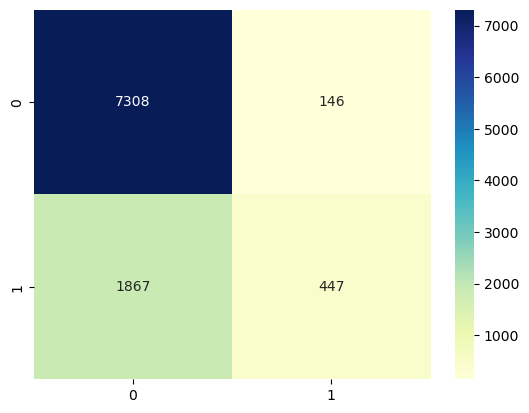

In [288]:
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# 16. Generate Classification Report

In [289]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      7454
        >50K       0.75      0.19      0.31      2314

    accuracy                           0.79      9768
   macro avg       0.78      0.59      0.59      9768
weighted avg       0.79      0.79      0.74      9768



# 17. Evaluate Classification accuracy

In [290]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [291]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.793918918918919

# 18. Evaluate Classification error

In [292]:
error=(FP + FN) / (TP + TN + FP + FN)
error

0.20608108108108109

# 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [293]:
y_pred_prob = gnb.predict_proba(X_test)
print(y_pred_prob)

[[9.99497764e-01 5.02235733e-04]
 [9.99484377e-01 5.15623197e-04]
 [9.99514577e-01 4.85422596e-04]
 ...
 [3.97560161e-01 6.02439839e-01]
 [9.99295922e-01 7.04078290e-04]
 [9.99346428e-01 6.53571558e-04]]


In [294]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999498,0.000502
1,0.999484,0.000516
2,0.999515,0.000485
3,0.999520,0.000480
4,0.998985,0.001015
...,...,...
9763,0.999532,0.000468
9764,0.999493,0.000507
9765,0.397560,0.602440
9766,0.999296,0.000704


In [295]:
gnb.predict_proba(X_test)

array([[9.99497764e-01, 5.02235733e-04],
       [9.99484377e-01, 5.15623197e-04],
       [9.99514577e-01, 4.85422596e-04],
       ...,
       [3.97560161e-01, 6.02439839e-01],
       [9.99295922e-01, 7.04078290e-04],
       [9.99346428e-01, 6.53571558e-04]])

# 20. Plot histogram of predicted probabilities

In [296]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

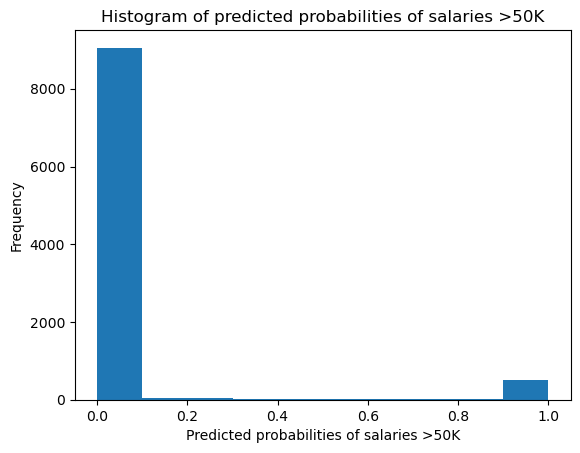

In [297]:
plt.hist(y_pred1)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# 21. Plot ROC Curve

Text(0.5, 1.0, 'ROC curve')

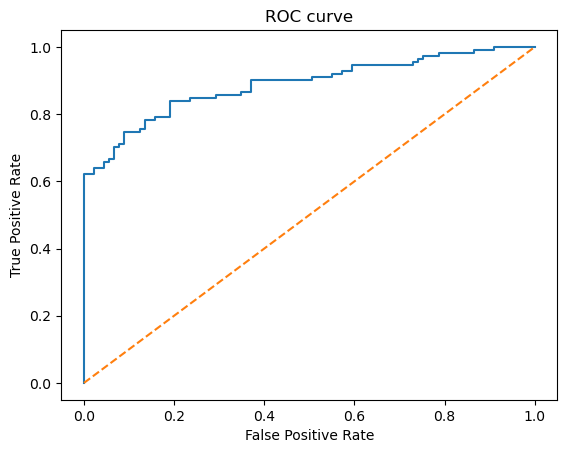

In [336]:
from sklearn.metrics import roc_curve, auc
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# 22. Compute ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
ROC_AUC

# 23. Calculate cross-validated ROC AUC

In [299]:
from sklearn.model_selection import cross_val_score
cv= cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc')
cv

array([0.67663415, 0.71065926, 0.68569609, 0.69208479, 0.69354067])

# 24. Applying 10-Fold Cross Validation

In [300]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
scores

array([0.79122807, 0.78640351, 0.79245283, 0.79640193, 0.78543221,
       0.78762615, 0.79245283, 0.78938131, 0.79289162, 0.7898201 ])

# 25. Compute the Average cross-validation score

In [301]:
cv.mean()

0.6917229912665073

In [302]:
scores.mean()

0.7904090552181244